In [47]:
new_Y = []

# gammas are +1    hadrons are -1

for i in range(len(Y)):
    if (Y.iloc[i] == 'g'):
        new_Y.append(1)
    if(Y.iloc[i] == 'h'):
        new_Y.append(-1)
        
Y_df = pd.DataFrame({'category' : new_Y})
data_rescaled_and_indexed = pd.merge(X_rescaled, Y_df,left_index=True, right_index=True)
data_rescaled_and_indexed = data_rescaled_and_indexed.drop('fAlpha', axis=1)

K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)   

n_attempts = 10000
limit = 0.2 
best_scores = []
best_f = []
best_t = []
best_score = 0
partial_aucs = []

print('n_iter, score')

for i in range (n_attempts):
    print(i)
    state = abs(np.random.normal(size=1))
    state = int(state[0] * 1000000)
    aucs = []
    auc_value=0
    partial_auc=0
    for train_idx, val_idx in kf.split(data_rescaled_and_indexed):  ###gets the index of training and validation set

        train_K=data_rescaled_and_indexed.iloc[train_idx]
        valid_K=data_rescaled_and_indexed.iloc[val_idx]
        X_train_K, Y_train_K = split_X_Y(train_K)
        X_valid_K, Y_valid_K = split_X_Y(valid_K)
        
        perceptron = Perceptron(alpha=0.01,penalty='l2',max_iter=50000,tol=1e-4,random_state=state,n_iter_no_change=10)
        fitted = perceptron.fit(X_train_K,Y_train_K)
    
        decision_values = perceptron.decision_function(X_valid_K)
        fpr, tpr, _ = roc_curve(Y_valid_K, decision_values)
        auc_value_k = auc(fpr, tpr)
        
        # keep fpr less than 0.2 (if not able to find it, partial auc is set to zero)
        fpr_filtered = fpr[fpr <= limit]

        if (len(fpr_filtered) < 2 ):
            partial_auc=0
        else:
            tpr_filtered = tpr[:len(fpr_filtered)]
            partial_auc_k = auc(fpr_filtered, tpr_filtered)
        partial_auc += partial_auc_k/K
        auc_value += auc_value_k/K
    if auc_value > best_score:
        best_score = auc_value
        best_scores.append(auc_value)
        best_f.append(fpr)
        best_t.append(tpr)
        #print(i, auc_mean)
    print('Partial AUC:', partial_auc)
    partial_aucs.append(partial_auc)
    print('AUC:', auc_value,'\n')
    aucs.append(auc_value)    

    
best_partial_auc = np.max(np.array(partial_aucs))
best_auc= np.max(np.array(aucs))
best_index = np.where(partial_aucs==best_partial_auc)[0]
print('Best partial AUC (validation set):', best_partial_auc)
print('AUC of best model (validation set):', best_auc,'\n')

n_iter, score
0
Partial AUC: 0.02281108492111714
AUC: 0.5961562351142782 

1
Partial AUC: 0.037813744594701125
AUC: 0.6550165875726365 

2
Partial AUC: 0.01588871489319998
AUC: 0.5540269297438382 

3
Partial AUC: 0.024092676310766198
AUC: 0.616695674005186 

4
Partial AUC: 0.02651131757584043
AUC: 0.5830384384430949 

5
Partial AUC: 0.02844067896013802
AUC: 0.5847779075286914 

6
Partial AUC: 0.02476456372934524
AUC: 0.5741583369450403 

7
Partial AUC: 0.023170386422391297
AUC: 0.5684024746840729 

8
Partial AUC: 0.02547192758832543
AUC: 0.5750597468296558 

9
Partial AUC: 0.030291100278787668
AUC: 0.6040054454906115 

10
Partial AUC: 0.023963606831610845
AUC: 0.5644362065714411 

11
Partial AUC: 0.02670880881708952
AUC: 0.5848199298359188 

12
Partial AUC: 0.03321202558417419
AUC: 0.6181131090309596 

13
Partial AUC: 0.02645785899160273
AUC: 0.606549492881653 

14
Partial AUC: 0.02903840597418626
AUC: 0.6275599102339475 

15
Partial AUC: 0.026174306662727145
AUC: 0.570055963662919 

1

Q value: 1.0206068558726478


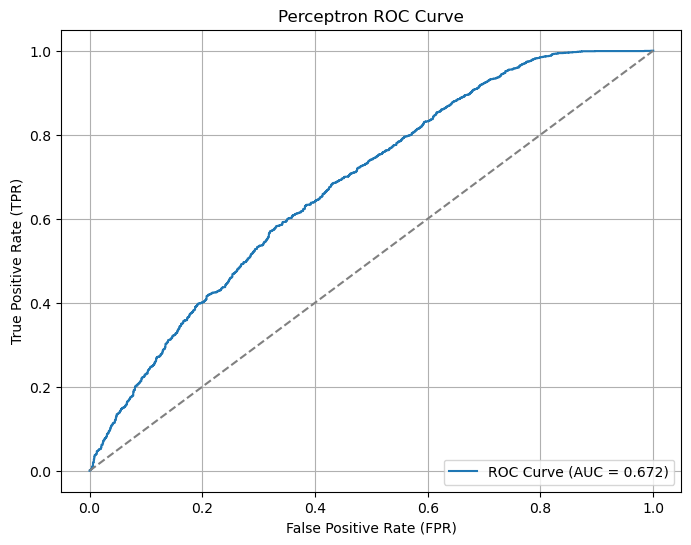

In [48]:
fig = plt.figure(figsize=(8, 6))

fpr_perceptron = best_f[len(best_f)-1] 
tpr_perceptron = best_t[len(best_f)-1]
Q_perceptron = get_best_Q(fpr_perceptron,tpr_perceptron)

print('Q value:',Q_perceptron)
plt.plot(fpr_perceptron, tpr_perceptron, label=f'ROC Curve (AUC = {best_scores[len(best_f)-1]:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.title('Perceptron ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show();